In [1]:
import sys
assert sys.version_info >= (3,7)

In [2]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [3]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [4]:
from pathlib import Path
IMAGENS_PATH = Path()/'imagens'/'training_linear_model'
IMAGENS_PATH.mkdir(parents=True, exist_ok=True)

def save_image(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = IMAGENS_PATH/f'{fig_id}.{fig_extension}'
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path,dpi=resolution, format=fig_extension)

### Linear Regression

In [5]:
import numpy as np

np.random.seed(42)
m = 100
X = 2 * np.random.rand(m,1)
y = 4 + 3*X + np.random.randn(m,1)

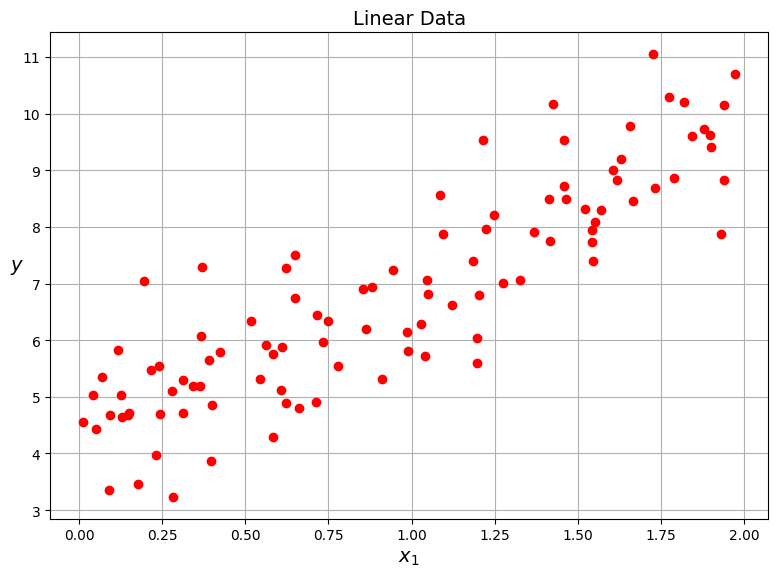

In [6]:
plt.figure(figsize=(8,6))
plt.title('Linear Data')
plt.plot(X, y, 'o', color='red')
plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation = 0)
plt.grid(True)
save_image("generated_data_plot")
plt.show()

### 📊 Método dos Mínimos Quadrados

O **Método dos Mínimos Quadrados (MMQ)** é uma técnica estatística utilizada para encontrar a **reta (ou curva)** que melhor se ajusta a um conjunto de dados, **minimizando o erro total** entre os valores observados e os valores estimados pelo modelo.

---

#### 🧩 Conceito Básico

Dado um conjunto de pontos experimentais $(x_i, y_i)$, deseja-se ajustar uma função $ f(x) $ tal que os **resíduos**:

$
e_i = y_i - f(x_i)
$

sejam os menores possíveis em termos de soma dos quadrados:

$
S = \sum_{i=1}^{n} e_i^2 = \sum_{i=1}^{n} (y_i - f(x_i))^2
$

O objetivo é **minimizar $ S $** em relação aos parâmetros da função $ f(x) $.

---

#### 📈 Caso Linear (Reta de Regressão)

Para o caso mais simples — uma **reta** $ y = a x + b $ — o método busca os valores de $ a $ (inclinação) e $ b $ (intercepto) que minimizam:

$
S(a, b) = \sum_{i=1}^{n} (y_i - a x_i - b)^2
$

Derivando e resolvendo o sistema de equações normais:

$
\begin{cases}
\sum y_i = a \sum x_i + n b \\
\sum x_i y_i = a \sum x_i^2 + b \sum x_i
\end{cases}
$

obtêm-se:

$
a = \frac{n \sum x_i y_i - \sum x_i \sum y_i}{n \sum x_i^2 - (\sum x_i)^2}
$

$
b = \frac{\sum y_i - a \sum x_i}{n}
$

---

#### 🧮 Exemplo Numérico

| x | y |
|:-:|:-:|
| 1 | 2 |
| 2 | 3 |
| 3 | 5 |
| 4 | 4 |

Aplicando as fórmulas, obtemos a reta aproximada:

$
y = 0.9x + 1.4
$

---

#### 📊 Interpretação

- **Resíduo**: diferença entre o valor observado e o valor previsto.  
- **R² (Coeficiente de determinação)**: mede a qualidade do ajuste (quanto mais próximo de 1, melhor).

$
R^2 = 1 - \frac{\sum (y_i - \hat{y_i})^2}{\sum (y_i - \bar{y})^2}
$

---

#### 🧠 Aplicações

- Regressão linear e múltipla  
- Ajuste de curvas experimentais  
- Modelagem estatística e econométrica  
- Aprendizado de máquina (regressões lineares e logísticas)

---

#### 🔗 Referências

- Montgomery, D. C., & Runger, G. C. *Applied Statistics and Probability for Engineers*.  
- Draper, N. R., & Smith, H. *Applied Regression Analysis*.


#### Regressao Multipla

Visa obter a relação entre varias observações X1, X2, X3 para um mesmo Y.

A formula direta é dada utilizando matrizes

In [7]:
#Realizando o calculo na mao
x_vzs_y = sum(X*y)
n_vzs_x_vzs_y = len(X)*x_vzs_y
sum_X_vzs_sum_y = sum(X)*sum(y)
X_2 = sum(X*X)
sum_X_2 = (sum(X))*(sum(X))

a = (n_vzs_x_vzs_y - sum_X_vzs_sum_y)/(len(X)*X_2 - sum_X_2)
b = (sum(y) - a*sum(X))/len(X)

In [8]:
a,b

(array([2.77011339]), array([4.21509616]))

In [9]:
def reta(a,b,X):
    return b + a*X

In [10]:
valores1 = reta(a,b,X)

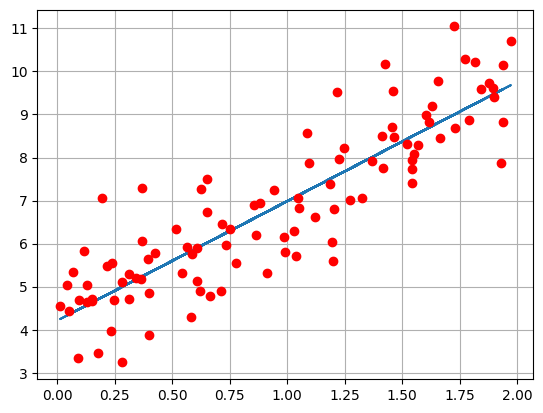

In [11]:
plt.plot(X,valores1)
plt.plot(X,y, 'o', color='red')
plt.grid()
plt.show()

Usando a biblioteca sklearn

### 🧮 Equação Matricial Normal — Método dos Mínimos Quadrados

O **método dos mínimos quadrados** busca encontrar o vetor de parâmetros $\boldsymbol{\theta}$ que minimiza o erro quadrático entre os valores observados $y$ e os valores previstos $\hat{y}$ por um modelo linear.

---

#### 📊 Modelo Linear Geral

O modelo de regressão linear pode ser escrito como:

$$
\hat{y} = X \boldsymbol{\theta}
$$

onde:

- $X$ é a **matriz de entrada** (também chamada de matriz de projeto), de dimensão $(n \times p)$:

$$
X =
\begin{bmatrix}
1 & x_{1,1} & x_{1,2} & \dots & x_{1,p} \\
1 & x_{2,1} & x_{2,2} & \dots & x_{2,p} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{n,1} & x_{n,2} & \dots & x_{n,p}
\end{bmatrix}
$$

- $\boldsymbol{\theta}$ é o **vetor de parâmetros** (coeficientes do modelo):

$$
\boldsymbol{\theta} =
\begin{bmatrix}
b \\ 
a_1 \\ 
a_2 \\ 
\vdots \\ 
a_p
\end{bmatrix}
$$

- $y$ é o **vetor de saídas observadas**:

$$
y =
\begin{bmatrix}
y_1 \\ y_2 \\ \vdots \\ y_n
\end{bmatrix}
$$

---

#### ⚙️ Função de Custo

O erro (ou resíduo) para cada observação é dado por:

$$
e_i = y_i - \hat{y}_i
$$

Assim, a soma dos quadrados dos erros é:

$$
S(\boldsymbol{\theta}) = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 = (y - X\boldsymbol{\theta})^T (y - X\boldsymbol{\theta})
$$

---

#### 🧠 Derivando a Equação Normal

Para minimizar $S(\boldsymbol{\theta})$, derivamos em relação a $\boldsymbol{\theta}$ e igualamos a zero:

$$
\frac{\partial S(\boldsymbol{\theta})}{\partial \boldsymbol{\theta}} = -2 X^T (y - X\boldsymbol{\theta}) = 0
$$

Isolando $\boldsymbol{\theta}$, obtemos a **equação normal**:

$$
X^T X \boldsymbol{\theta} = X^T y
$$

---

#### ✅ Solução Analítica

Desde que $X^T X$ seja invertível, o vetor de parâmetros ótimo é:

$$
\boldsymbol{\theta} = (X^T X)^{-1} X^T y
$$

---

#### 💡 Interpretação

- A matriz $(X^T X)$ representa as **correlações entre as variáveis de entrada**.  
- O termo $X^T y$ representa a **correlação entre as entradas e a saída**.  
- A inversa $(X^T X)^{-1}$ “remove” a redundância e fornece os **coeficientes de melhor ajuste**.

---

#### 🧩 Observação Prática

Em Python, essa equação pode ser resolvida com:

```python
import numpy as np
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)  # adiciona a coluna de 1s para o intercepto
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y


### 🧱 A Coluna de 1’s na Regressão Linear

A **coluna de 1’s** é um componente essencial da formulação **matricial** da regressão linear.  
Ela é usada para representar o **termo independente (intercepto)** do modelo.

---

#### 🔹 1. O modelo com intercepto

O modelo linear simples é dado por:

$$
\hat{y} = a x + b
$$

- $a$ → coeficiente angular (inclinação)  
- $b$ → intercepto (termo constante)

---

#### 🔹 2. Forma matricial sem a coluna de 1’s

Se escrevêssemos apenas os valores de $x$ na matriz $X$:

$$
X =
\begin{bmatrix}
x_1 \\
x_2 \\
x_3 \\
\vdots \\
x_n
\end{bmatrix}
$$

Então o modelo seria:

$$
\hat{y} = X a
$$

➡️ Nesse caso, **não há termo $b$**, e a reta seria **forçada a passar pela origem** $(0,0)$.

---

#### 🔹 3. Adicionando a coluna de 1’s

Para incluir o termo $b$, adicionamos uma **coluna de 1’s** à matriz $X$, formando uma nova matriz $X_b$:

$$
X_b =
\begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
1 & x_3 \\
\vdots & \vdots \\
1 & x_n
\end{bmatrix}
$$

O vetor de parâmetros passa a ser:

$$
\boldsymbol{\theta} =
\begin{bmatrix}
b \\ 
a
\end{bmatrix}
$$

Agora, o modelo matricial é:

$$
\hat{y} = X_b \boldsymbol{\theta}
$$

---

#### 🔹 4. O que a coluna de 1’s faz

- Permite representar o **termo constante $b$** dentro da multiplicação matricial.  
- Garante que o modelo possa **ajustar o deslocamento vertical da reta**.  
- Sem essa coluna, o modelo teria apenas coeficientes multiplicando variáveis (sem intercepto).  
- Em regressões múltiplas, o mesmo conceito se aplica — a coluna de 1’s continua representando o **intercepto global**.

---

#### 🔹 5. Implementação em Python

Você pode adicionar a coluna de 1’s manualmente:

```python
import numpy as np
X_b = np.c_[np.ones((len(X), 1)), X]


In [12]:
X_b = np.c_[np.ones((len(X), 1)), X]
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [13]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [14]:
valores = reta(theta_best[0],theta_best[1],X)

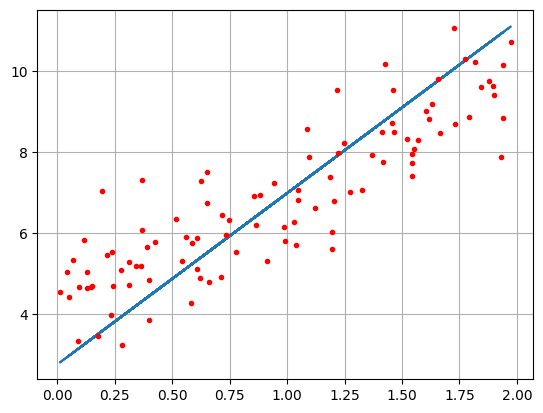

In [15]:
plt.plot(X,valores)
plt.plot(X,y, 'r.')
plt.grid()
plt.show()

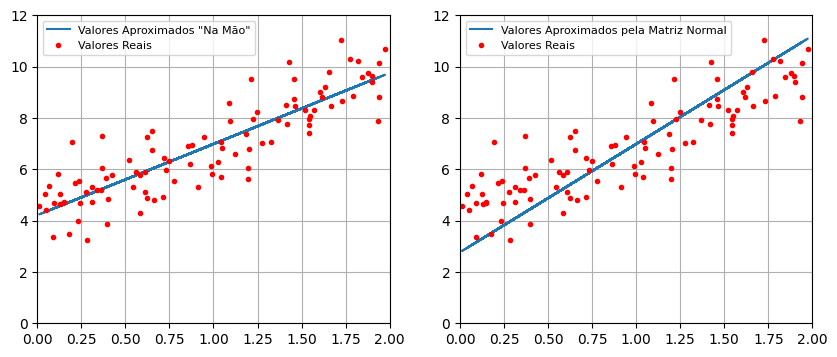

In [16]:
fig, axis = plt.subplots(1, 2, figsize=(10,4))

axis[0].set_xlim(0, 2)
axis[0].set_ylim(0, 12)
axis[1].set_xlim(0, 2)
axis[1].set_ylim(0, 12)

axis[0].plot(X,valores1, label='Valores Aproximados "Na Mão"')
axis[0].plot(X,y,'r.', label='Valores Reais')
axis[0].legend(fontsize=8)

axis[1].plot(X,valores, label='Valores Aproximados pela Matriz Normal')
axis[1].plot(X,y,'r.', label='Valores Reais')
axis[1].legend(fontsize=8)

axis[0].grid(True)
axis[1].grid(True)
plt.show()

In [17]:
from sklearn.linear_model import LinearRegression

model_linear = LinearRegression()
model_linear.fit(X,y)
model_linear.intercept_, model_linear.coef_

(array([4.21509616]), array([[2.77011339]]))

### 🏡 Exemplo real: preço de uma casa (dependência múltipla)

Vamos supor que queremos **prever o preço de uma casa ($y$)** com base em várias características físicas e de localização.

---

#### 🔹 Variável dependente (saída)

- $y$: **preço da casa** (em milhares de reais)

---

#### 🔹 Variáveis independentes (entradas)

| Símbolo | Variável | Tipo |
|:--|:--|:--|
| $x_1$ | Área construída (m²) | Numérica |
| $x_2$ | Número de quartos | Numérica |
| $x_3$ | Distância do centro (km) | Numérica |
| $x_4$ | Idade do imóvel (anos) | Numérica |

---

#### 🔹 Modelo matemático (linear múltiplo)

$$
y = b + a_1x_1 + a_2x_2 + a_3x_3 + a_4x_4 + \varepsilon
$$

onde:
- $b$ → intercepto (preço base, mesmo sem atributos)
- $a_1, a_2, a_3, a_4$ → coeficientes que medem a influência de cada variável
- $\varepsilon$ → erro aleatório (diferença entre valor real e previsto)

---

#### 🔹 Interpretação dos coeficientes

| Coeficiente | Interpretação |
|:--|:--|
| $a_1 = 2.5$ | A cada 1 m² a mais, o preço aumenta R\$ 2.500 |
| $a_2 = 15$ | Cada quarto extra adiciona R\$ 15.000 ao preço |
| $a_3 = -3$ | A cada 1 km mais distante do centro, o preço cai R\$ 3.000 |
| $a_4 = -1$ | Cada ano de idade reduz o preço em R\$ 1.000 |
| $b = 120$ | Preço base de R\$ 120.000 |

---

#### 🔹 Exemplo numérico

Para uma casa com:
- 100 m²  
- 3 quartos  
- 5 km do centro  
- 10 anos de idade  

Temos:

$$
y = 120 + 2.5(100) + 15(3) - 3(5) - 1(10)
$$

$$
y = 120 + 250 + 45 - 15 - 10 = 390
$$

💰 **Preço estimado: R\$ 390.000**

---

#### 🔹 Forma matricial

$$
\hat{y} = X \boldsymbol{\theta}
$$

onde:

$$
X =
\begin{bmatrix}
1 & x_{1,1} & x_{1,2} & x_{1,3} & x_{1,4} \\
1 & x_{2,1} & x_{2,2} & x_{2,3} & x_{2,4} \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
1 & x_{n,1} & x_{n,2} & x_{n,3} & x_{n,4}
\end{bmatrix}
,\quad
\boldsymbol{\theta} =
\begin{bmatrix}
b \\ a_1 \\ a_2 \\ a_3 \\ a_4
\end{bmatrix}
$$

---

#### 🔹 Em Python (exemplo ilustrativo)

```python
import numpy as np

# Variáveis independentes: [área, quartos, distância, idade]
X = np.array([
    [100, 3, 5, 10],
    [80, 2, 8, 20],
    [120, 4, 3, 5]
])

# Adiciona a coluna de 1's (intercepto)
X_b = np.c_[np.ones((len(X), 1)), X]

# Coeficientes (b, a1, a2, a3, a4)
theta = np.array([120, 2.5, 15, -3, -1])

# Previsão dos preços
y_pred = X_b @ theta
print(y_pred)


#### Implementado o metodo do gradiente descendente

### 📏 Método MSE — Mean Squared Error (Erro Quadrático Médio)

O **MSE (Mean Squared Error)** mede o **erro médio ao quadrado** entre os valores reais ($y_i$) e os valores previstos ($\hat{y}_i$) de um modelo.

Ele é uma **métrica de avaliação** usada para quantificar o quão bem (ou mal) um modelo se ajusta aos dados observados.

---

#### 🔹 1. Fórmula do MSE

O **Erro Quadrático Médio** é definido como:

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

onde:

- $n$ → número de amostras  
- $y_i$ → valor real (observado)  
- $\hat{y}_i$ → valor previsto pelo modelo  
- $(y_i - \hat{y}_i)$ → erro (ou resíduo) de cada observação  

---

#### 🔹 2. Interpretação

- O **MSE** indica **quão longe** (em média) as previsões estão dos valores reais.  
- Como o erro é **elevado ao quadrado**, erros grandes têm **peso maior**.  
- O **MSE nunca é negativo**, pois $(y_i - \hat{y}_i)^2 \ge 0$.

📈 **Quanto menor o MSE, melhor o modelo.**

---

#### 🔹 3. Relação com o método dos mínimos quadrados

No método dos mínimos quadrados, o objetivo é **minimizar a soma dos erros quadrados**:

$$
S = \sum (y_i - \hat{y}_i)^2
$$

O **MSE** é simplesmente essa soma **dividida pelo número de observações ($n$)**:

$$
MSE = \frac{S}{n}
$$

Minimizar $S$ ou minimizar o $MSE$ resulta no **mesmo modelo ótimo** — a diferença é apenas uma normalização pela quantidade de dados.

---

#### 🔹 4. Exemplo numérico

Suponha que temos:

| $i$ | $y_i$ (real) | $\hat{y}_i$ (previsto) |
|:--:|:--:|:--:|
| 1 | 3 | 2.5 |
| 2 | 5 | 4.8 |
| 3 | 2 | 2.2 |

Cálculo:

$$
MSE = \frac{1}{3}[(3 - 2.5)^2 + (5 - 4.8)^2 + (2 - 2.2)^2]
$$

$$
MSE = \frac{1}{3}[0.25 + 0.04 + 0.04] = \frac{0.33}{3} = 0.11
$$

✅ **MSE = 0.11**

---

#### 🔹 5. Em Python

```python
import numpy as np

y_real = np.array([3, 5, 2])
y_pred = np.array([2.5, 4.8, 2.2])

mse = np.mean((y_real - y_pred) ** 2)
print("MSE =", mse)


#### Metodo do passo

$\boldsymbol{\theta}_{j+1}$ = ${\theta}_j - {\eta}{\nabla}MSE({\theta}_j)$

__Em que :__

$\boldsymbol{\theta}_{j+1}$ : Proximo passo

${\theta}_j$ : Passo atual

${\eta}$ : Taxa de aprendizado

${\nabla}MSE({\theta}_j)$ : Gradiente Do Erro Quadratico Medio Atual

O caso linear possue uma formula fechada para o gradiente:


### 🔺 Derivação do Gradiente do MSE — Regressão Linear Múltipla

Queremos derivar o **gradiente do Erro Quadrático Médio (MSE)** em relação aos parâmetros $\boldsymbol{\theta}$ para o modelo linear múltiplo:

$$
\hat{y} = X \boldsymbol{\theta}
$$

onde:

- $X$ → matriz de entradas (dimensão $n \times p$)  
- $\boldsymbol{\theta}$ → vetor de parâmetros (dimensão $p \times 1$)  
- $y$ → vetor de valores reais (dimensão $n \times 1$)  
- $\hat{y}$ → vetor de valores previstos ($n \times 1$)

---

#### 🔹 1. Definição do MSE

O **Erro Quadrático Médio** é definido como:

$$
J(\boldsymbol{\theta}) = \frac{1}{2n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Na forma **matricial**, temos:

$$
J(\boldsymbol{\theta}) = \frac{1}{2n} (y - X\boldsymbol{\theta})^T (y - X\boldsymbol{\theta})
$$

> O fator $\frac{1}{2}$ é incluído apenas para simplificar a derivação (ele cancela o 2 na diferenciação).

---

#### 🔹 2. Expansão do termo quadrático

Expandindo o produto escalar:

$$
J(\boldsymbol{\theta}) = \frac{1}{2n} \left[ y^T y - y^T X \boldsymbol{\theta} - \boldsymbol{\theta}^T X^T y + \boldsymbol{\theta}^T X^T X \boldsymbol{\theta} \right]
$$

Sabendo que $y^T X \boldsymbol{\theta}$ é escalar (igual ao seu transposto), podemos simplificar:

$$
J(\boldsymbol{\theta}) = \frac{1}{2n} \left[ y^T y - 2 \boldsymbol{\theta}^T X^T y + \boldsymbol{\theta}^T X^T X \boldsymbol{\theta} \right]
$$

---

#### 🔹 3. Derivando em relação a $\boldsymbol{\theta}$

Aplicando o operador gradiente:

$$
\nabla_{\boldsymbol{\theta}} J(\boldsymbol{\theta}) = \frac{1}{2n} \nabla_{\boldsymbol{\theta}} 
\left[ y^T y - 2 \boldsymbol{\theta}^T X^T y + \boldsymbol{\theta}^T X^T X \boldsymbol{\theta} \right]
$$

Agora derivamos termo a termo:

1. $\nabla_{\boldsymbol{\theta}}(y^T y) = 0$  (não depende de $\boldsymbol{\theta}$)  
2. $\nabla_{\boldsymbol{\theta}}(-2 \boldsymbol{\theta}^T X^T y) = -2 X^T y$  
3. $\nabla_{\boldsymbol{\theta}}(\boldsymbol{\theta}^T X^T X \boldsymbol{\theta}) = 2 X^T X \boldsymbol{\theta}$

Substituindo tudo:

$$
\nabla_{\boldsymbol{\theta}} J(\boldsymbol{\theta}) = \frac{1}{2n} [ -2 X^T y + 2 X^T X \boldsymbol{\theta} ]
$$

Simplificando o fator 2:

$$
\nabla_{\boldsymbol{\theta}} J(\boldsymbol{\theta}) = \frac{1}{n} (X^T X \boldsymbol{\theta} - X^T y)
$$

---

#### 🔹 4. Condição de mínimo (gradiente igual a zero)

Para minimizar o MSE, igualamos o gradiente a zero:

$$
\nabla_{\boldsymbol{\theta}} J(\boldsymbol{\theta}) = 0
$$

$$
X^T X \boldsymbol{\theta} - X^T y = 0
$$

---

#### 🔹 5. Solução analítica — Equação normal

Isolando $\boldsymbol{\theta}$:

$$
\boxed{
\boldsymbol{\theta} = (X^T X)^{-1} X^T y
}
$$

Essa é a **solução exata (analítica)** da regressão linear múltipla obtida através da **diferenciação do MSE**.

---

#### 🔹 6. Interpretação do gradiente

O gradiente:

$$
\nabla_{\boldsymbol{\theta}} J(\boldsymbol{\theta}) = \frac{1}{n} X^T (X\boldsymbol{\theta} - y)
$$

indica a **direção de maior aumento do erro**.  
Em métodos iterativos (como *gradient descent*), atualizamos os parâmetros no sentido **oposto** ao gradiente:

$$
\boldsymbol{\theta} := \boldsymbol{\theta} - \eta \, \nabla_{\boldsymbol{\theta}} J(\boldsymbol{\theta})
$$

onde $\eta$ é a **taxa de aprendizado**.

---

#### ✅ Conclusão

- O gradiente do MSE fornece a **direção de ajuste dos parâmetros**.  
- Igualando o gradiente a zero, obtemos a **solução ótima analítica**.  
- Essa derivação é a base de algoritmos de **otimização** e **aprendizado de máquina**.

$$
\boxed{
\nabla_{\boldsymbol{\theta}} J(\boldsymbol{\theta}) = \frac{1}{n} X^T (X\boldsymbol{\theta} - y)
}
$$

$$
\boxed{
\boldsymbol{\theta} = (X^T X)^{-1} X^T y
}
$$


Processo iterativo em todo o conjunto de dados

In [18]:
from sklearn.preprocessing import add_dummy_feature
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)  # add x0 = 1 to each instance

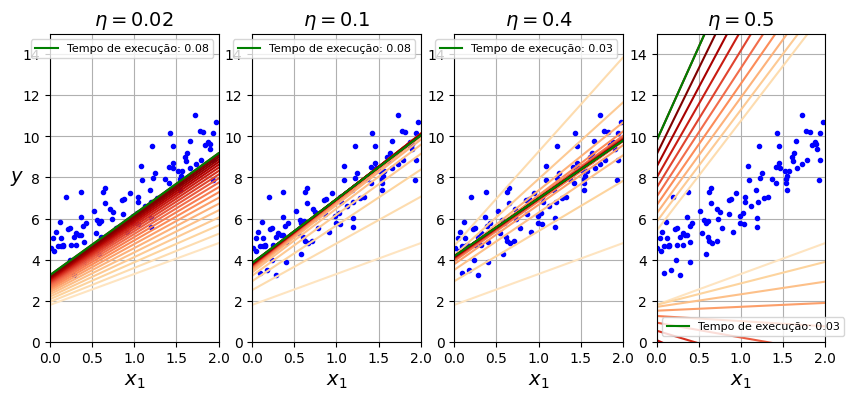

In [19]:
import matplotlib as mpl
import time
def gradiente(X,theta, y):
    n = len(X)
    return (2/n)*(X.T)@(X @ theta - y)

def plot_gradient(X,y,eta,theta):
    inicio = time.time()
    iteracoes = 1000
    n_show = 20
    plt.plot(X[:,1],y,'b.')
    theta_path = []
    for x in range(iteracoes):
        if x < n_show:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(x / n_show + 0.15))
            plt.plot(X_new,y_predict,linestyle="solid",color=color)
        theta_path.append(theta)
        theta = theta - eta*gradiente(X,theta,y)
        

    fim = time.time()
    plt.plot(X_new,y_predict,linestyle="solid",color='green', label=f'Tempo de execução: {(fim - inicio):.2f}')
    
    plt.legend(fontsize = 8)
    plt.xlabel("$x_1$")
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return(theta_path)

theta = np.random.uniform(1,2,(2,1))
plt.figure(figsize=(10, 4))

X_b = np.c_[(np.ones((len(X),1))),X]

plt.subplot(141)
plot_gradient(X_b,y,0.02,theta.copy())
plt.ylabel("$y$", rotation=0)

plt.subplot(142)
theta_path_bgd = plot_gradient(X_b,y,0.1,theta.copy())
theta_otimo = theta_path_bgd[-1]

plt.subplot(143)
plot_gradient(X_b,y,0.4,theta.copy())

plt.subplot(144)
plot_gradient(X_b,y,0.5,theta.copy())

plt.show()


Theta Otimo com treinamento com __todo o conjunto__

In [20]:
theta_otimo

array([[4.21509616],
       [2.77011339]])

Gradiente Descendente Estocastico

Tecnica do gradiente aplicada em pequenos lotes aleatorios

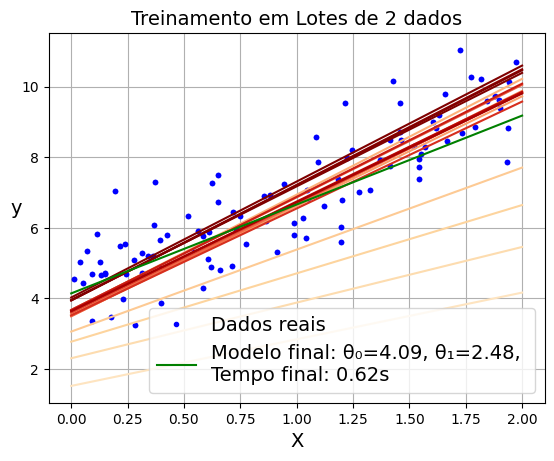

In [21]:
import time

def gradiente(X,theta, y):
    n = len(X)
    return (2/n)*(X.T)@(X @ theta - y)

t0, t1 = 5, 50
def learning_rate(t):
    return t0 / (t + t1)

index = np.arange(len(X))
np.random.shuffle(index)
X_shuffle = X[index]
Y_shuffle = y[index]
samples = 2
inicio = 0
theta = np.random.uniform(1,2,(2,1))
n_epochs = 50

#Metodo para unir arrays por colunas
X_b = np.c_[np.ones((len(X_shuffle), 1)), X_shuffle]
plt.ion()
fig, ax = plt.subplots()
ax.plot(X, y, 'b.', label='Dados reais')
ax.set_title(f"Treinamento em Lotes de {samples} dados")
ax.set_xlabel("X")
ax.set_ylabel("y", rotation=0)
ax.grid(True)

ax.plot(X,y, 'b.')
inicio = time.time()  # marca o tempo de início
theta_path_sgd = []
for epoch in range(n_epochs):
    for iteration in range(0,(len(X)//samples)):
        y_predict = [[1,0],[1,2]] @ theta
        x_lote = X_b[iteration*samples:(iteration+1)*samples]
        y_lote = Y_shuffle[iteration*samples:(iteration+1)*samples]
        eta = learning_rate((iteration+1)*2)
        color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / 20 + 0.15))
        if epoch == 0 and iteration < 20:
            ax.plot([0,2], y_predict, color = color)
        theta_path_sgd.append(theta)
        theta = theta - eta*gradiente(x_lote,theta,y_lote)
        
fim = time.time()  # marca o tempo final
ax.plot([0,2], y_predict, color = 'green', label=f'Modelo final: θ₀={theta[0,0]:.2f}, θ₁={theta[1,0]:.2f}, \nTempo final: {(fim - inicio):.2f}s')
    

plt.legend()
plt.show()


In [22]:
theta

array([[4.09080169],
       [2.48100703]])

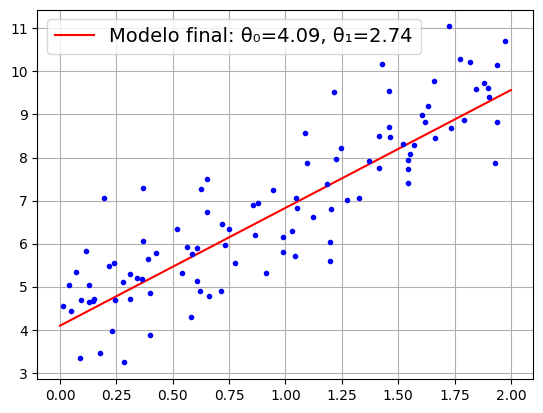

[[4.09288502]
 [2.73737463]]


In [23]:
epoca = 50

#Inicializando com valores aleatorios
theta = np.random.uniform(1,2, (2,1))

# indexes aleatorios
random_index = np.random.permutation(100)

#amostrando dados 
x = X[random_index]
y_ = y[random_index]

#coluna de 1's
X_b = np.c_[np.ones((len(x), 1)), x]

#parametros de aprendizagem
t0,t1 = 5, 10

def  learning_schedule(t):
    return t0/(t1 + t)

def gradiente(X,theta, y):
    n = len(X)
    return (2/n)*(X.T)@(X @ theta - y)

theta_path_sgd = []

for epoca_n in range(epoca):
    head = 0
    tail = 1
    i = 0
    while tail < len(X_b) - 1:
        eta = learning_schedule(epoca_n + i)
        i = i + 1
        xi = X_b[i:i+1]
        yi = y_[i:i+1]
        theta_path_sgd.append(theta)
        theta = theta - eta*gradiente(xi,theta,yi)
        # head = head + 2
        tail = tail + 1
y_pred = [[1,0],[1,2]] @ theta
plt.plot([0,2], y_pred, 'r',label = f'Modelo final: θ₀={theta[0][0]:.2f}, θ₁={theta[1][0]:.2f}')
plt.plot(X,y, 'b.')
plt.grid()
plt.legend()
plt.show()
print(theta)

In [24]:
theta_otimo

array([[4.21509616],
       [2.77011339]])

O modelo em pequenos lotes realiza operação pequenas, matrizes de 3x3, 2x2 e varias operações sobre o conjunto de dados: epocas = 50

O modelo de lote completo realiza operações sobre todo o conjunto de dados, levando a multiplicações de matrizes de ordem 100x100 = 10000 elementos

In [25]:
from sklearn.linear_model import SGDRegressor
sgd_model = SGDRegressor(max_iter=300, tol=1e-5, penalty=None, eta0=0.01, n_iter_no_change= 25, random_state=42)
sgd_model.fit(X,y.ravel())

,loss,'squared_error'
,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,300
,tol,1e-05
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,42


In [26]:
sgd_model.intercept_, sgd_model.coef_

(array([4.20898032]), array([2.77628852]))

O __SGDRegressor__ é a aplicação do __LinearRegression__ em mini lotes

__SGDRegressor__ : melhor ao lidar com datasets gigantes, porem nesse caso simples tambem gerou um resultado bom. Realiza o calculo para __uma unica instância por vez__

__LinearRegression__ : faz o calculo exato via minimos quadrados, pode ser demorado para datasets grandes, porem é otimo para medios e pequenos

A aplicação do SGD em Mini lotes é mais otimizada que o SGD quando se trata de otimização por GPU, devido aos calculos em paralelo e otimizações em operações matriciais, porem é mais suscetivel a parar em minimos locais

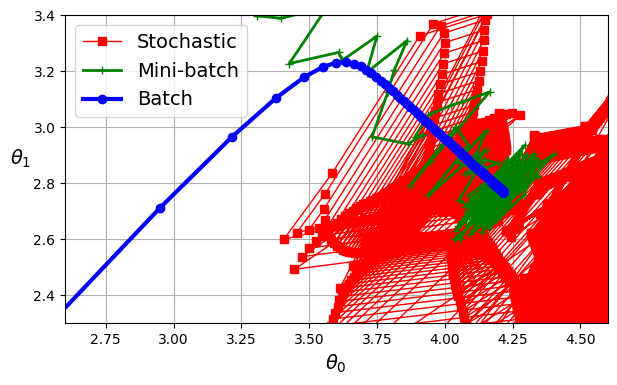

In [27]:
from math import ceil

n_epochs = 50
mini_batch_size = 20
n_batches_per_epoch = ceil(m / mini_batch_size)

np.random.seed(42)

theta = np.random.uniform(0,2,(2,1))

t0,t1 = 200,1000

def learning_schedule(t):
    return t0/(t+t1)

theta_path_mgd = []

X_b = np.c_[np.ones(len(X)),X]

for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for iteration in range(0, n_batches_per_epoch):
        idx = iteration * mini_batch_size
        xi = X_b_shuffled[idx : idx + mini_batch_size]
        yi = y_shuffled[idx : idx + mini_batch_size]
        gradients = 2 / mini_batch_size * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(epoch * n_batches_per_epoch + iteration)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)
        
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7, 4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1,
         label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2,
         label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3,
         label="Batch")
plt.legend(loc="upper left")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$   ", rotation=0)
plt.axis([2.6, 4.6, 2.3, 3.4])
plt.grid()
plt.show()

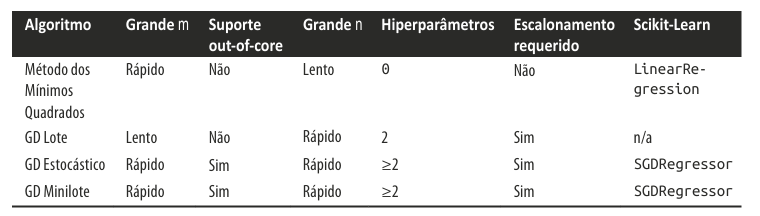

# 🧠 SGDRegressor — Hiperparâmetros do scikit-learn

## 📘 Visão Geral
O **`SGDRegressor`** (Stochastic Gradient Descent Regressor) é um modelo de regressão linear que utiliza o **método de descida de gradiente estocástica** para otimizar os parâmetros.  
Seu objetivo é minimizar uma função de perda $L(w)$ ajustando os pesos $w$ de forma iterativa a cada amostra ou mini-lote.

---

## ⚙️ Principais Hiperparâmetros

### **1. `loss`**
- Define a **função de perda** a ser minimizada.  
- Controla como o erro entre o valor previsto $\hat{y}$ e o valor real $y$ é penalizado.  
- **Opções:**
  - `"squared_error"` → $L = \frac{1}{2}(y - \hat{y})^2$  
  - `"huber"` → Combina MSE e MAE, sendo mais robusta a outliers.  
  - `"epsilon_insensitive"` → Ignora erros menores que $\epsilon$, similar ao SVR.  
  - `"squared_epsilon_insensitive"` → Versão quadrática da anterior.

---

### **2. `penalty`**
- Tipo de **regularização** aplicada para controlar a complexidade do modelo.  
- **Opções:**
  - `"l2"` → $ \frac{1}{2} \alpha ||w||_2^2 $ (Ridge)  
  - `"l1"` → $ \alpha ||w||_1 $ (Lasso)  
  - `"elasticnet"` → Combinação das duas:  
    $ \alpha \left( \rho ||w||_1 + \frac{1 - \rho}{2} ||w||_2^2 \right) $

---

### **3. `alpha`**
- Coeficiente de **regularização** que controla a força da penalização.  
- Valores maiores de $\alpha$ aumentam a regularização e reduzem o overfitting.  
- Valor padrão: $0.0001$

---

### **4. `l1_ratio`**
- Mistura entre $L1$ e $L2$ quando `penalty="elasticnet"`.  
- $l1\_ratio = 1$ → apenas $L1$  
- $l1\_ratio = 0$ → apenas $L2$

---

### **5. `fit_intercept`**
- Define se o modelo deve calcular o **intercepto** $b$.  
- `True` → o modelo ajusta $b$  
- `False` → assume que os dados já estão centralizados.

---

### **6. `max_iter`**
- Número máximo de **iterações (épocas)** sobre o conjunto de dados.  
- Controla quantas vezes o algoritmo passa pelos dados antes de parar.

---

### **7. `tol`**
- Critério de **tolerância para parada**.  
- Se a melhoria na função de perda for menor que `tol`, o treinamento é encerrado.  
- Valor padrão: `1e-3`

---

### **8. `shuffle`**
- Indica se os dados devem ser **embaralhados** a cada iteração.  
- `True` ajuda na convergência estável do gradiente estocástico.

---

### **9. `learning_rate`**
- Define como a **taxa de aprendizado** $\eta$ é ajustada ao longo do treinamento.  
- **Opções:**
  - `"constant"` → $\eta_t = \eta_0$  
  - `"optimal"` → $\eta_t = \frac{1}{\alpha (t_0 + t)}$  
  - `"invscaling"` → $\eta_t = \eta_0 / t^{power\_t}$  
  - `"adaptive"` → reduz $\eta$ quando não há melhora na perda.

---

### **10. `eta0`**
- **Taxa de aprendizado inicial** ($\eta_0$).  
- Controla o tamanho dos passos na atualização dos pesos.

---

### **11. `power_t`**
- Exponente usado em `"invscaling"` para controlar a redução da taxa de aprendizado.  
- Valor padrão: `0.25`

---

### **12. `early_stopping`**
- Se `True`, o treinamento é interrompido quando a perda em um conjunto de validação não melhora por várias iterações.

---

### **13. `validation_fraction`**
- Fração dos dados reservada para validação quando `early_stopping=True`.  
- Valor padrão: `0.1`

---

### **14. `n_iter_no_change`**
- Número de iterações sem melhora antes de parar quando `early_stopping=True`.

---

### **15. `random_state`**
- Define a **semente aleatória** para reprodutibilidade dos resultados.

---

### **16. `epsilon`**
- Usado em perdas como `"huber"` e `"epsilon_insensitive"`.  
- Define o limite abaixo do qual o erro não é penalizado.

---

### **17. `average`**
- Se `True`, realiza a **média dos coeficientes** ao longo das iterações, o que pode melhorar a estabilidade.

---

## 🧩 Resumo Matemático
A atualização dos pesos em cada iteração segue a regra:

$$
w_{t+1} = w_t - \eta_t (\nabla L(w_t) + \alpha R(w_t))
$$

onde:  
- $w_t$ → vetor de pesos no passo $t$  
- $\eta_t$ → taxa de aprendizado  
- $L(w_t)$ → função de perda  
- $R(w_t)$ → termo de regularização  
- $\alpha$ → intensidade da regularização

---

## ✅ Conclusão
O `SGDRegressor` é um modelo flexível e escalável, ideal para grandes volumes de dados.  
O ajuste adequado dos **hiperparâmetros** — especialmente `alpha`, `learning_rate`, e `loss` — é essencial para equilibrar **viés**, **variância** e **convergência**.


### Ajuste Polinomial

O seguinte polinomio é um exemplo de Ordem 2: 
* ${y(x) = ax^2 + bx + c}$

Tal polinomio pode ser aproximado em um ponto pelo Polimonio de Taylor de ${1^a}$ Ordem:
* ${L(x) = f(x_0)} + f'(x_0)(x-x_0)$

In [28]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.6*X**2 + X + 2 + np.random.rand(m,1) # adicionando ruido gaussiano

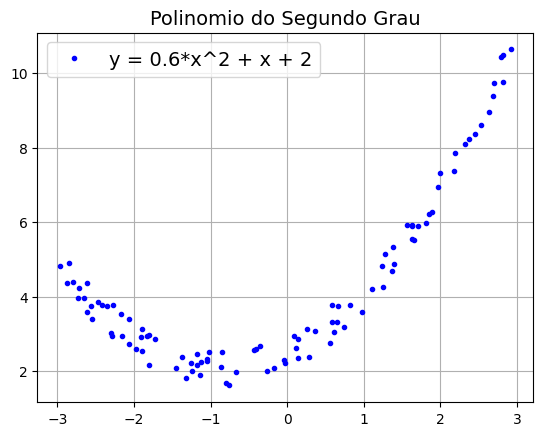

In [29]:
plt.plot(X,y,'b.', label=f'y = 0.6*x^2 + x + 2')
plt.legend()
plt.title("Polinomio do Segundo Grau")
plt.grid()

In [30]:
#Aplicando o modelo linear convencional
from sklearn.linear_model import LinearRegression
reg_linear = LinearRegression()
reg_linear.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [31]:
reg_linear.intercept_, reg_linear.coef_

(array([4.3913989]), array([[0.8987108]]))

In [32]:
X_b = np.c_[np.ones(len(X)),X]
y_pred = X_b@[[4.42208773],[0.84229519]]

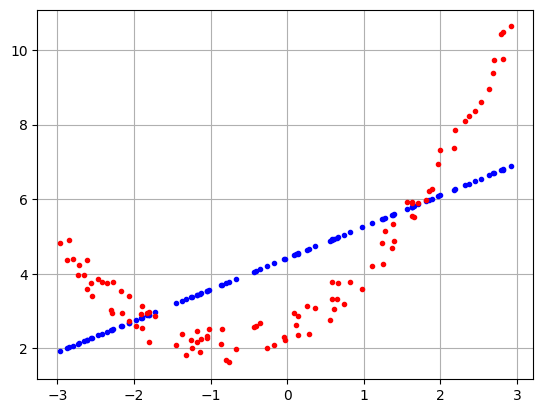

In [33]:
plt.plot(X,y_pred,'b.')
plt.plot(X,y,'r.')
plt.grid()

Utilizando de __Tranformações Lineares__ para ajustar o espaço de variaveis e dessa forma se torna possivel linearizar os parametros

In [34]:
#Aplicando tecnicas de linearização junto com transformação linear
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias=False)

X_poly = poly_features.fit_transform(X)
X_poly[0], X[0]

(array([-0.75275929,  0.56664654]), array([-0.75275929]))

In [35]:
reg_linear.fit(X_poly,y)
reg_linear.coef_, reg_linear.intercept_

(array([[0.9943591 , 0.59967213]]), array([2.49786712]))

In [36]:
X_new = np.linspace(-3,3,100).reshape(100,1)#os metodos de pre-processamento trabalhando com objetos de dimensao maior que 1
X_new_poly = poly_features.transform(X_new) 
y_new = reg_linear.predict(X_new_poly)

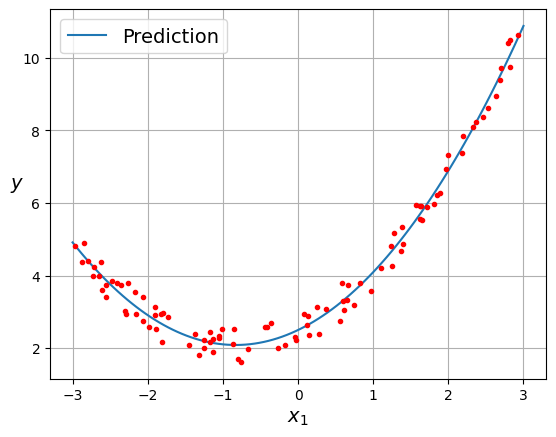

In [37]:
plt.plot(X_new,y_new, label='Prediction')
plt.plot(X,y, 'r.')
plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation=0)
plt.legend()
plt.grid()

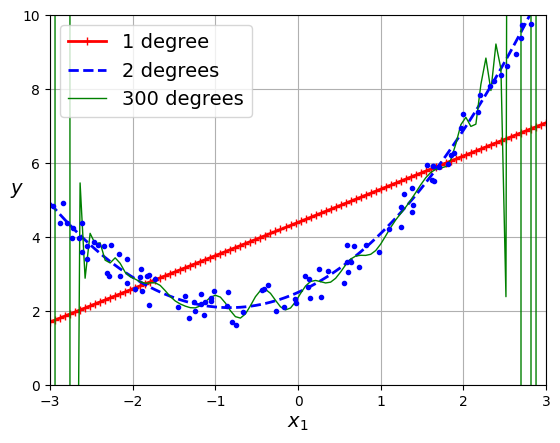

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

for style, width, degree in (('r+-', 2,1), ('b--', 2,2),('g',1,300)):
    
    poly = PolynomialFeatures(degree=degree,include_bias=False)
    reg_linear = LinearRegression()
    std_scaler = StandardScaler()

    #Ajeitando os dados para o grau 2
    X_poly = poly.fit_transform(X)
    #Normalizando os dados
    X_poly = std_scaler.fit_transform(X_poly)
    #Aprendendo com dados normalizados e tratados
    reg_linear.fit(X_poly,y)
    #Array com 100 amostras e 1 coluna de features, com pontos de -3 a 3
    X_new = np.linspace(-3,3,100).reshape(100,1)
    #Transformando os valores amostrados
    X_new_poly = poly.transform(X_new) 
    #Normalizando
    X_new_poly = std_scaler.transform(X_new_poly)
    #Fazendo a predição com o modelo ajustado aos dados de treino
    y_new = reg_linear.predict(X_new_poly)
    
    label = f"{degree} degree{'s' if degree > 1 else ''}"
    plt.plot(X_new, y_new, style, label=label, linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()


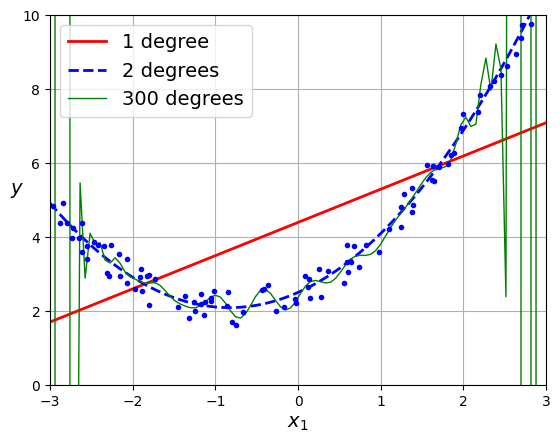

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

for style, width, degree in (('r-', 2,1),('b--', 2,2),('g',1,300)):
    
    poly = PolynomialFeatures(degree=degree,include_bias=False)
    reg_linear = LinearRegression()
    std_scaler = StandardScaler()

    # Maneira mais limpa de tratar os dados usando make_pipeline
    model = make_pipeline(poly, std_scaler, reg_linear)
    
    #O fit é aplicado ao ultimo objeto de model
    model.fit(X,y)

    X_new = np.linspace(-3,3,100).reshape(100,1)
    y_new = model.predict(X_new)
    
    label = f"{degree} degree{'s' if degree > 1 else ''}"
    plt.plot(X_new, y_new, style, label=label, linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

O exemplo acima trata os casos de undefiting e overfiting:
* __underfiting__: o modelo nao se ajusta aos dados e sempre erra
* __overfiting__: o modelo se ajuste demais aos dados, e nao consegue prever dados novos

### __Curva de Aprendizado__

Curva para medir o overfitting ou o undefitting de um modelo. Analisa o erro de acordo com o tamanho do conjunto de treino

In [40]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

def learning_curve(model, X,y):

    X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=.2, random_state=42, shuffle=True )
    train_errors, val_errors = [], []

    for m in range(1,len(X_train)):

        model.fit(X_train[:m],y_train[:m])
        #Predição nos dados de treino
        y_train_predict = model.predict(X_train[:m])
        #Predição nos dados de teste/ validação
        y_val_predict = model.predict(X_val)

        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
        
    plt.plot(np.sqrt(train_errors),'r+-', label='Train Errors', linewidth=2)
    plt.plot(np.sqrt(val_errors),'b', label='Val Errors', linewidth=3)
    plt.xlabel("Test Size")
    plt.ylabel("RMSE")
    plt.grid()
    plt.legend()

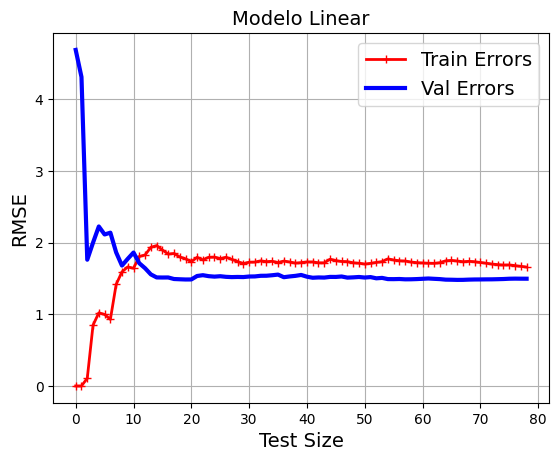

In [41]:
plt.title("Modelo Linear")
learning_curve(reg_linear,X,y)

In [42]:
#Aplicando cross validation
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

def learning_curve_cross_validation(model, X,y):

    X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=.2, random_state=42, shuffle=True )
    train_errors, val_errors = [], []

    for m in range(4,len(X_train)):

        scores_train = cross_val_score(model, X_train[:m], y_train[:m],cv=4, scoring='neg_root_mean_squared_error')
        train_errors.append(-scores_train.mean())
        
        model.fit(X_train[:m], y_train[:m])
        y_pred = model.predict(X_val)
        val_error = root_mean_squared_error(y_val, y_pred)
        val_errors.append(val_error)
        
    plt.plot(np.sqrt(train_errors),'r+-', label='Train Errors', linewidth=2)
    plt.plot(np.sqrt(val_errors),'b', label='Val Errors', linewidth=3)
    plt.xlabel("Test Size")
    plt.ylabel("RMSE")
    plt.grid()
    plt.legend()

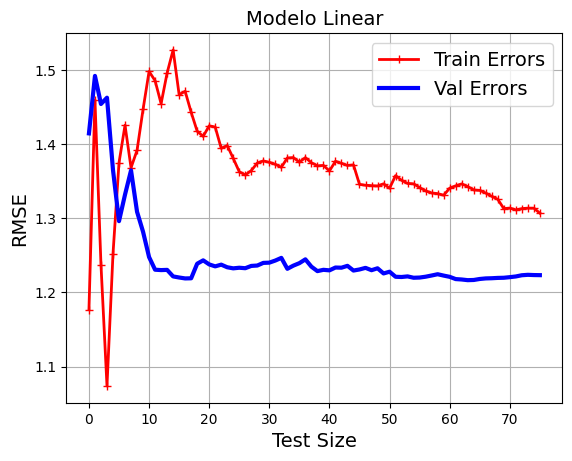

In [43]:
plt.title("Modelo Linear")
learning_curve_cross_validation(reg_linear,X,y)


Observa-se na curva de aprendizagem que o conjunto de teste com tamanho 45, aproximadamente, ja não há alteração no erros da predição.

O modelo linear utilizado nao apresenta uma boa generalização e a curva indica um modelo Subajustado.

Subajuste caracterizado por __curvas altas e proximas__

O metodo learning_curve():

 * retorna três matrizes: train_sizes, train_scores, valid_scores
 * train_sizes: retorna uma matriz 1D com n tamanhos de cada treino
 * train_scores: retorna uma matriz com n linhas e cada coluna o score do treino com o tamanho correspondente
 * valid_scores: retorna uma matriz com n linhas e cada coluna o score do treino com o tamanho correspondente


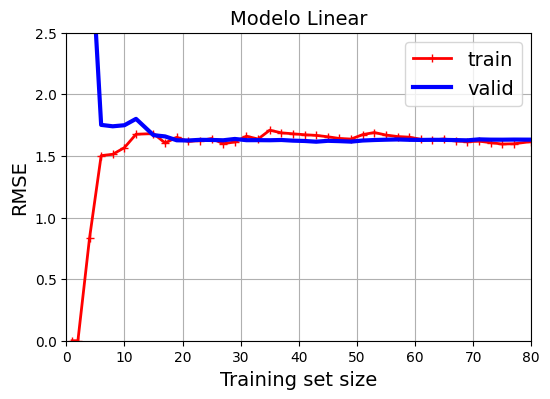

In [44]:
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

# extra code – beautifies and saves Figure 4–15
plt.title("Modelo Linear")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0, 80, 0, 2.5])

plt.show()

(np.float64(0.0), np.float64(80.0), np.float64(0.0), np.float64(2.5))

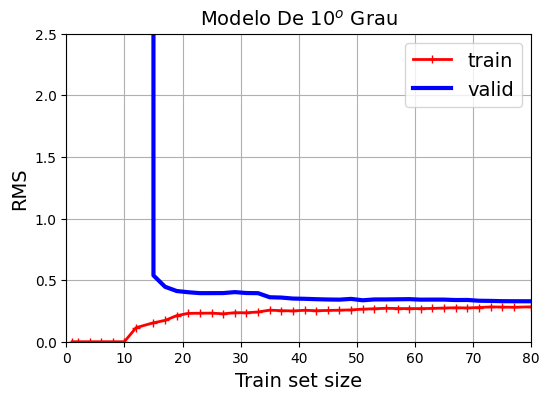

In [45]:
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(PolynomialFeatures(degree=10, include_bias=False), reg_linear)
train_sizes, train_scores, valid_scores = learning_curve(pipeline,X,y,train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.grid()
plt.legend()
plt.title("Modelo De $10^o$ Grau")
plt.ylabel("RMS")
plt.xlabel("Train set size")
plt.axis([0, 80, 0, 2.5])

Ao utilzar um modelo mais complexo, com grau 10, a curva se torna superajustada aos dados e isso prejudica ao adicionar dados novos.

Um modelo com sobreajuste reduzira seu erro a medida que aumenta-se o conjunto de dados de treino

### Modelos Regularizados

Para evitar o sobreajuste é limitar os graus dos polinomios. A seguir alguns modelos regularizados

#### Regularização de Ridge (penality = l2)

Adiciona-se um termo do tipo ${\boldsymbol{A} = \alpha\sum\theta^2}$ ao metodo de regressao linear, __o coeficiente linear não é penalizado__:

$$
\boxed{
\boldsymbol{\theta} = (X^T X + \boldsymbol{A})^{-1} X^T y
}
$$

Lembra o metodo de Levenberg Marquared

O metodo adiciona ao final um termo de erro: 
* ERRO = ${\sum(y_i - y)^2 + \alpha\sum\theta^2}$

Esse modelo penaliza paramatros grandes, puxando o resultado para baixo com o termo regulador ${\alpha}$.

O objetivo é penalizar features grandes, evitando que uma feature mande no modelo. E para isso há o aumento do erro.

* Seu objetivo é combater o overfitting

A regularização, no caso bidimensional, ocorre no perimetro de um circunferencia:

${\beta^2 _1 + \beta^2 _2 = c }$, se c = 1:
* ${\beta^2 _1 + \beta^2 _2 = 1 }$, o conjunto de parametros esta na circunferencia do circulo de raio 1 e centro na origem (0,0)

In [46]:
m = 20
X = 3*np.random.rand(m,1)
y = 1 + 0.5*X + np.random.rand(m,1)/1.5
X_new =np.linspace(0,3,100).reshape(100,1)

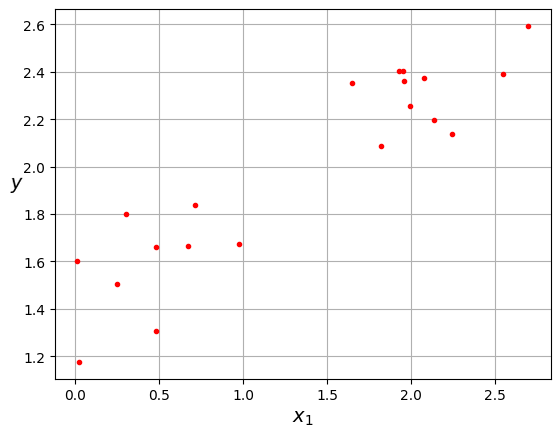

In [47]:
plt.plot(X,y,'r.')
plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation=1)
plt.grid()

Coeficientes: [[-1.44232412e+01  3.87167481e+02 -4.04831531e+03  2.29451397e+04
  -7.84304000e+04  1.68198565e+05 -2.27158945e+05  1.87227870e+05
  -8.59240348e+04  1.68177050e+04]]
Coeficientes: [ 1.00711719 -4.71846748  7.82091839  2.13985585 -5.87872719 -6.58438981
 -0.34688945  6.74216677  6.9150971  -6.67988155]
Coeficientes: [ 0.25317314  0.13692116  0.0501877  -0.00695196 -0.03537027 -0.04144348
 -0.03249983 -0.01449544  0.00836952  0.03333866]


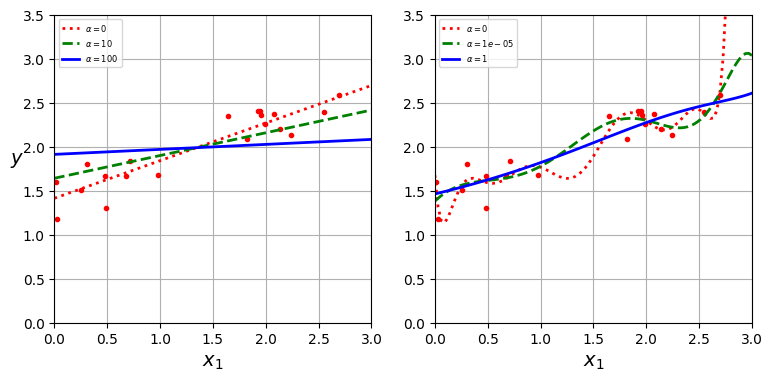

In [48]:
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_args):

    plt.plot(X,y,'r.')
    for alpha, style in zip(alphas, ("r:","g--","b-")):
        if alpha > 0:
            model = model_class(alpha=alpha,**model_args)
        else:
            model = LinearRegression()
        
        if polynomial:
            model = make_pipeline(
                PolynomialFeatures(degree=10, include_bias=False),
                StandardScaler(),
                model
            )
        model.fit(X,y)
        if(polynomial):
             print("Coeficientes:", model.steps[-1][1].coef_)
        y_predict = model.predict(X_new)
        plt.plot(X_new, y_predict, style,linewidth=2,
                 label=fr"$\alpha = {alpha}$")
        plt.legend(loc="upper left", fontsize = 6)
        plt.xlabel("$x_1$")
        plt.axis([0, 3, 0, 3.5])
        plt.grid()

plt.figure(figsize=(9,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0,10,100), random_state = 42)
plt.ylabel('$y$', rotation = 0)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state = 42)
plt.show()

Valores altos de ${\alpha}$ levam a respostas mais planas. A regressao de grau 10 foi severamente planificada por um grau alto do termo regulador

O regulador de Ridge é utilizado nos modelos como penality= l2.

In [49]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty='l2', alpha=0.1/m, tol=None, eta0=0.01)
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([2.05406029])

In [50]:
ridge_reg = Ridge(alpha=.1, solver='sag', random_state=42)
ridge_reg.fit(X,y.ravel())
ridge_reg.predict([[1.5]])

array([2.05495424])

In [51]:
ridge_reg.intercept_, ridge_reg.coef_

(np.float64(1.4180153883157882), array([0.4246259]))

Solução linear analitica de Ridge

In [52]:
alpha = 0.1
#Matriz de penalização
#A coluna 0, do coeficiente linear nao é penalizada
A = np.array([[0., 0.], [0., 1.]])
X_b = np.c_[np.ones(m), X]
np.linalg.inv(X_b.T @ X_b + alpha * A) @ X_b.T @ y

array([[1.41807149],
       [0.4245842 ]])

### Regrassão Lasso (penality = l1)

A regularização Lasso utiliza a norma L1 para regular o erro do metodo:

* ERRO = ${\sum(y_i - y)^2 + \alpha\sum\theta}$

O conjunto de parametros, no caso bidimensional, forma um diamente e esse pontos acontecem quando algum dos parametros se torna Zero:

${\beta _1 + \beta _2 = c }$, se c = 1:
* $(1,0)$
* $(-1,0)$
* $(0,1)$
* $(0,-1)$

A regularização Lasso tem a caracteristica de zerar features irrelevantes. Essa caracteristica de zerar features impede que esse metodo obtenha uma solução fechada.

Coeficientes: [[-1.44232412e+01  3.87167481e+02 -4.04831531e+03  2.29451397e+04
  -7.84304000e+04  1.68198565e+05 -2.27158945e+05  1.87227870e+05
  -8.59240348e+04  1.68177050e+04]]
Coeficientes: [ 0.36369423  0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.        ]
Coeficientes: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


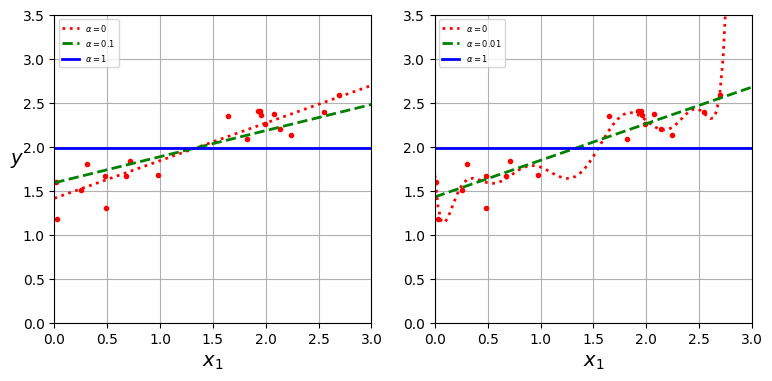

In [53]:
from sklearn.linear_model import Lasso

lasso = Lasso(random_state=42)

plt.figure(figsize=(9,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0,0.1,1), random_state = 42)
plt.ylabel('$y$', rotation = 0)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0,0.01,1), random_state = 42)
plt.show()

Observa-se que o polinomio de Grau 10, na segunda imagem, se planificou totalmente devido a maior parte dos seus parametros terem sido zerados pelo Lasso

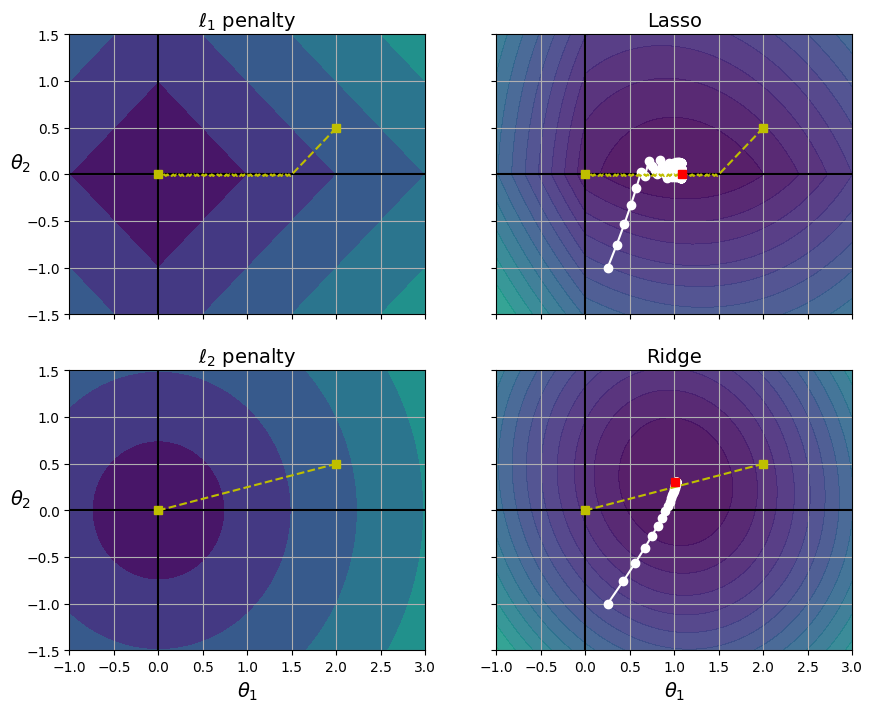

In [54]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1 / len(Xr) * ((T @ Xr.T - yr.T) ** 2).sum(axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(J.argmin(), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

def bgd_path(theta, X, y, l1, l2, core=1, eta=0.05, n_iterations=200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = (core * 2 / len(X) * X.T @ (X @ theta - y)
                     + l1 * np.sign(theta) + l2 * theta)
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))

for i, N, l1, l2, title in ((0, N1, 2.0, 0, "Lasso"), (1, N2, 0, 2.0, "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2 ** 2

    tr_min_idx = np.unravel_index(JR.argmin(), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levels = np.exp(np.linspace(0, 1, 20)) - 1
    levelsJ = levels * (J.max() - J.min()) + J.min()
    levelsJR = levels * (JR.max() - JR.min()) + JR.min()
    levelsN = np.linspace(0, N.max(), 10)

    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(theta=np.array([[2.0], [0.5]]), X=Xr, y=yr,
                      l1=np.sign(l1) / 3, l2=np.sign(l2), core=0)
    ax = axes[i, 0]
    ax.grid()
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    ax.contourf(t1, t2, N / 2.0, levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(fr"$\ell_{i + 1}$ penalty")
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$")
    ax.set_ylabel(r"$\theta_2$", rotation=0)

    ax = axes[i, 1]
    ax.grid()
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$")

plt.show()

### Regularização Elastic Net

É um meio termo entre Lasso e Ridge:

${ERRO = \sum(y-y_i)^2 + r*\alpha\sum|\theta| + \frac{1-r}{2}*\alpha\sum\theta^2}$

# 📘 Regularização em Regressão: Ridge, Lasso e Elastic Net

A regularização é um conjunto de técnicas usadas para reduzir overfitting em modelos lineares penalizando coeficientes excessivamente grandes.  
Os métodos mais utilizados são **Ridge**, **Lasso** e **Elastic Net**.

---

## 🔍 Por que usar regularização?

### ✔ Vantagens
- Reduz overfitting, controlando a complexidade do modelo  
- Melhora generalização  
- Lida melhor com multicolinearidade  
- Pode realizar seleção automática de variáveis (Lasso)  
- Torna o modelo mais estável e robusto  

### ✘ Desvantagens
- Introduz viés nos coeficientes  
- Exige escolha cuidadosa do hiperparâmetro ${\alpha}$ (alpha)  
- Lasso pode ser instável quando as variáveis são altamente correlacionadas  
- Nem sempre é trivial interpretar o efeito da penalização nos coeficientes  

---

# 🟦 Ridge Regression (Regularização L2)

### 📌 Ideia
O Ridge adiciona uma penalização proporcional ao **quadrado** dos coeficientes:

$
{\alpha \sum \theta_i^2}
$

Essa penalização encolhe os coeficientes, mas **não os zera**.  
O modelo continua usando todas as variáveis, porém com magnitudes ajustadas para evitar overfitting.

### ✔ Quando usar Ridge
- Quando existe **multicolinearidade** entre variáveis  
- Quando você acredita que **todas as features têm alguma influência**  
- Quando deseja um modelo estável, com baixa variância  
- Em casos onde *feature selection* não é necessária  

### ✘ Quando evitar
- Quando é importante **zerar coeficientes** e eliminar variáveis  
- Quando há muitas features irrelevantes  

---

# 🟧 Lasso Regression (Regularização L1)

### 📌 Ideia
O Lasso adiciona uma penalização proporcional ao **valor absoluto** dos coeficientes:

$
{\alpha \sum |\theta_i|}
$

Isso faz com que coeficientes pequenos possam ser completamente zerados →  
📌 **seleção automática de variáveis**.

### ✔ Quando usar Lasso
- Quando deseja um modelo **mais simples e interpretável**  
- Quando existem muitas variáveis irrelevantes  
- Quando é desejável reduzir dimensionalidade automaticamente  
- Quando o número de variáveis é muito maior do que o número de observações  

### ✘ Quando evitar
- Quando há **alta correlação entre variáveis**  
  (Lasso tende a escolher uma variável e ignorar as outras, de forma instável)  
- Quando precisar assegurar que todas as variáveis permaneçam no modelo  

---

# 🟨 Elastic Net (Combinação L1 + L2)

### 📌 Ideia
O Elastic Net combina as penalizações L1 e L2:

$
{ \alpha \sum |\theta_i| + (1-\alpha)\sum \theta_i^2}
$

Assim, ele oferece simultaneamente:
- **seleção de variáveis** (L1)  
- **estabilidade com variáveis correlacionadas** (L2)  

É frequentemente considerado um meio-termo robusto entre Ridge e Lasso.

### ✔ Quando usar Elastic Net
- Quando há **muitas variáveis correlacionadas**  
- Quando é preciso *feature selection* mas Lasso sozinho é instável  
- Quando se deseja um modelo competitivo e robusto com muitos preditores  
- Em problemas de alta dimensionalidade (ex: genética, texto, dados esparsos)  

### ✘ Quando evitar
- Quando busca simplicidade extrema (Ridge ou Lasso podem bastar)  
- Quando a interpretação deve ser extremamente direta  

---

# 🧭 Como escolher: Ridge, Lasso ou Elastic Net?

| Situação / Objetivo | Melhor escolha |
|---------------------|----------------|
| Muitas variáveis correlacionadas | **Ridge** ou **Elastic Net** |
| Precisa selecionar variáveis | **Lasso** |
| Seleção com estabilidade quando há correlação | **Elastic Net** |
| Quer manter todas as variáveis | **Ridge** |
| Alta interpretabilidade | **Lasso** |
| Equilíbrio geral | **Elastic Net** |

---

# 🎯 Resumo Final

- **Ridge (L2):** encolhe coeficientes, não zera → ótimo para multicolinearidade.  
- **Lasso (L1):** pode zerar coeficientes → ótimo para seleção de variáveis.  
- **Elastic Net (L1 + L2):** equilíbrio → ideal quando há correlação e necessidade de seleção.  



### Parada Antecipada

O modelo ira parar assim que o erro no conjunto de teste começar a aumentar e o erro no conjunto treino começar a diminuir (situação de overfitting - sobreajuste)

In [55]:
np.random.seed(42)
m = 100
X = 6*np.random.rand(m,1)-3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

In [56]:
x_train, y_train = X[:m//2], y[:m//2,0]
x_validation, y_validation = X[m//2:], y[m//2:,0]

In [57]:
y.shape,y_validation.shape


((100, 1), (50,))

In [58]:
try:
    from sklearn.metrics import root_mean_squared_error
except ImportError:
    from sklearn.metrics import mean_squared_error

    def root_mean_squared_error(labels, predictions):
        return mean_squared_error(labels, predictions, squared=False)

In [59]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
pre_processing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False), StandardScaler())

X_train_prepared = pre_processing.fit_transform(x_train)
X_val_prepared = pre_processing.transform(x_validation)

In [60]:
from sklearn.linear_model import SGDRegressor
from copy import deepcopy
sgd_reg = SGDRegressor(random_state=42, penalty=None, eta0=0.002)
n_epochs = 500
best_validation_rms = float('inf')
train_errors, val_errors = [],[]

for epoch in range(n_epochs):
    #partial.fit() permite treinar o modelo sem resetar os parametros ja aprendidos, aprendizado incremental online, aprendizado continuo
    #fit() zera e treina o modelo desde o inicio, primeira vez vendo os dados
    sgd_reg.partial_fit(X_train_prepared, y_train)
    y_valid_predict = sgd_reg.predict(X_val_prepared)
    val_error = root_mean_squared_error(y_validation, y_valid_predict)
    if val_error < best_validation_rms:
        best_validation_rms = val_error
        best_model = deepcopy(sgd_reg)

    # extra code – we evaluate the train error and save it for the figure
    y_train_predict = sgd_reg.predict(X_train_prepared)
    train_error = root_mean_squared_error(y_train, y_train_predict)
    val_errors.append(val_error)
    train_errors.append(train_error)

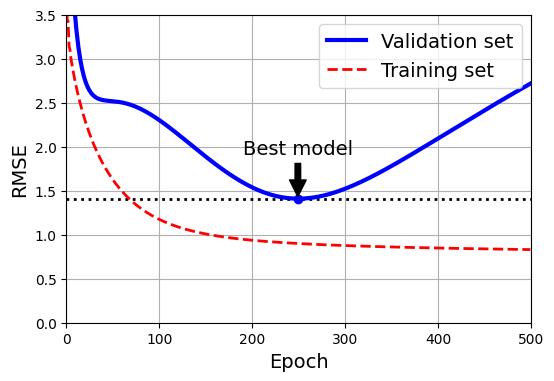

In [61]:
# extra code – this section generates and saves Figure 4–20
best_epoch = np.argmin(val_errors)
plt.figure(figsize=(6, 4))
plt.annotate('Best model',
             xy=(best_epoch, best_validation_rms),
             xytext=(best_epoch, best_validation_rms + 0.5),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.plot([0, n_epochs], [best_validation_rms, best_validation_rms], "k:", linewidth=2)
plt.plot(val_errors, "b-", linewidth=3, label="Validation set")
plt.plot(best_epoch, best_validation_rms, "bo")
plt.plot(train_errors, "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.axis([0, n_epochs, 0, 3.5])
plt.grid()
plt.show()

In [62]:
teste = np.arange(1,10)
np.argmin([1,2,0,3])

np.int64(2)

### Regressao Logistica

Utilizada para separar classes, separação binaria (0,1)

In [70]:
# m = 100
# X = np.random.rand(m)
# y = 1/(1-np.exp(X)) + np.random.rand(m)
lim = 6
np.random.seed(42)
m = 100
X = np.linspace(-lim,lim,m)
y = 1/(1+np.exp(-1*X))

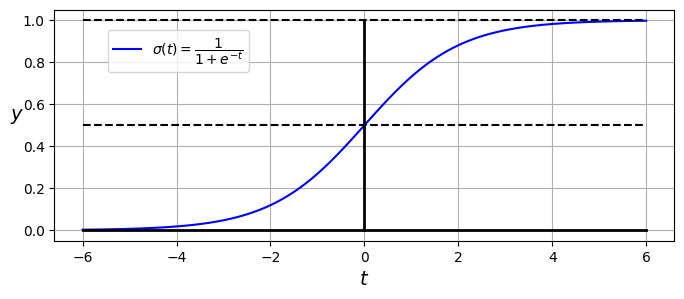

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(X,y,'b', label=r"$\sigma(t) = \dfrac{1}{1 + e^{-t}}$")
plt.plot([-lim,lim],[1,1],'k--')
plt.plot([-lim,lim],[0.5,0.5],'k--')
plt.plot([0,0],[0,1],'k-', linewidth=2)
plt.plot([-lim,lim],[0,0],'k-', linewidth=2)
plt.legend(loc="lower center", bbox_to_anchor=(0.2, .7), fontsize=10)
plt.grid()
plt.xlabel('$t$')
plt.ylabel('$y$', rotation=0)
plt.show()

In [65]:
X.shape

(100,)

# Derivação da Equação 4-18 — Gradiente da Função de Custo Logística

Nesta seção, derivamos passo a passo a expressão do gradiente da função de custo da **regressão logística**. 

#### Tal metodo utiliza do conceito da Distribuição de Bernoulli e do conceito de verossimilhança

---

## 1. Modelo logístico

O modelo prevê a probabilidade de uma amostra pertencer à classe 1:

$$
\hat{y}^{(i)} = \sigma(\theta^T x^{(i)})
$$

onde:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

---

## 2. Função de custo (Log Loss)

A função custo para **m** amostras é:

$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m}
\left[
y^{(i)}\log(\hat{y}^{(i)}) 
+ (1 - y^{(i)})\log(1 - \hat{y}^{(i)})
\right]
$$

---

## 3. Objetivo

Queremos derivar:

$$
\frac{\partial}{\partial \theta_j} J(\theta)
$$

---

## 4. Derivando termo a termo

Começamos derivando o custo de apenas um exemplo:

$$
L^{(i)} = -\left[ y^{(i)}\log(\hat{y}^{(i)}) 
+ (1 - y^{(i)})\log(1 - \hat{y}^{(i)}) \right]
$$

Precisamos de:

$$
\frac{\partial L^{(i)}}{\partial \theta_j}
= 
\frac{\partial L^{(i)}}{\partial \hat{y}^{(i)}}
\cdot
\frac{\partial \hat{y}^{(i)}}{\partial z^{(i)}}
\cdot
\frac{\partial z^{(i)}}{\partial \theta_j}
$$

onde:

- $z^{(i)} = \theta^T x^{(i)}$

---

## 4.1 Derivada da Log Loss em relação à predição

Sabemos que:

$$
\frac{\partial L^{(i)}}{\partial \hat{y}^{(i)}} 
= 
-\frac{y^{(i)}}{\hat{y}^{(i)}} + \frac{1 - y^{(i)}}{1 - \hat{y}^{(i)}}
$$

Simplificando:

$$
\frac{\partial L^{(i)}}{\partial \hat{y}^{(i)}}
=
\hat{y}^{(i)} - y^{(i)}
$$

---

## 4.2 Derivada do sigmoid

Como:

$$
\hat{y}^{(i)} = \sigma(z^{(i)})
$$

então:

$$
\frac{\partial \hat{y}^{(i)}}{\partial z^{(i)}} = 
\sigma(z^{(i)})(1 - \sigma(z^{(i)})) = \hat{y}^{(i)} (1 - \hat{y}^{(i)})
$$

---

## 4.3 Derivada de $z^{(i)}$ em relação a $\theta_j$

Como:

$$
z^{(i)} = \sum_{k=1}^{n} \theta_k x_k^{(i)}
$$

então:

$$
\frac{\partial z^{(i)}}{\partial \theta_j} = x_j^{(i)}
$$

---

## 5. Juntando tudo

Multiplicando as três partes:

$$
\frac{\partial L^{(i)}}{\partial \theta_j}
=
(\hat{y}^{(i)} - y^{(i)}) x_j^{(i)}
$$

---

## 6. Generalizando para todas as amostras

O custo total é a média, então:

$$
\frac{\partial}{\partial \theta_j} J(\theta)
=
\frac{1}{m} 
\sum_{i=1}^{m}
(\hat{y}^{(i)} - y^{(i)})
x_j^{(i)}
$$

onde:

$$
\hat{y}^{(i)} = \sigma(\theta^T x^{(i)})
$$

---

# ✔ Resultado final (Equação 4-18)

$$
\frac{\partial}{\partial \theta_j} J(\theta)
=
\frac{1}{m}
\sum_{i=1}^{m}
\left( \sigma(\theta^T x^{(i)}) - y^{(i)} \right)
x_j^{(i)}
$$

---

# Conclusão

- A derivada da Log Loss combinada com a sigmoide simplifica drasticamente.
- O gradiente final depende do **erro da previsão** multiplicado pela **feature correspondente**.
- Essa forma é usada diretamente no **gradiente descendente** para regressão logística e redes neurais.


# Forma Vetorizada do Gradiente da Regressão Logística

Depois de obter a expressão do gradiente componente a componente:

$$
\frac{\partial}{\partial \theta_j} J(\theta)
=
\frac{1}{m}
\sum_{i=1}^{m}
\left( \sigma(\theta^T x^{(i)}) - y^{(i)} \right)
x_j^{(i)},
$$

podemos reescrever isso de forma **matricial**, muito mais eficiente em termos computacionais.

---

## 1. Organização dos dados

Primeiro, organizamos o dataset em uma matriz:

- Matriz de atributos:

$$
X =
\begin{bmatrix}
---(x^{(1)})^T--- \\
---(x^{(2)})^T--- \\
\vdots \\
---(x^{(m)})^T---
\end{bmatrix}
\quad \in \mathbb{R}^{m \times n}
$$

Cada linha é um exemplo.  
Cada coluna é uma feature.

- Vetor de parâmetros:

$$
\theta \in \mathbb{R}^{n}
$$

- Vetor de rótulos:

$$
y =
\begin{bmatrix}
y^{(1)} \\
y^{(2)} \\
\vdots \\
y^{(m)}
\end{bmatrix}
$$

---

## 2. Predição vetorizada

O modelo logístico calcula:

$$
z = X\theta
$$

onde:

- $X$ é $m \times n$
- $\theta$ é $n \times 1$
- resultado $z$ é um vetor de tamanho $m$

Aplicamos a função sigmoide elemento a elemento:

$$
\hat{y} = \sigma(z)
$$

---

## 3. Expressão vetorizada do gradiente

Sabemos que para cada amostra:

$$
\text{erro}^{(i)} = \hat{y}^{(i)} - y^{(i)}
$$

Então o vetor de erros é:

$$
\hat{y} - y
$$

Agora note que o somatório:

$$
\sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)}) x_j^{(i)}
$$

é exatamente o produto matricial:

$$
X^T (\hat{y} - y)
$$

---

## ⭐ Resultado final — forma vetorizada

$$
\nabla_\theta J(\theta)
=
\frac{1}{m} X^T (\hat{y} - y)
$$

---

## 4. Interpretação intuitiva

- $X^T$ combina cada **coluna** da matriz (cada feature)  
- $(\hat{y} - y)$ é o vetor de **erros das previsões**  
- O produto $X^T(\hat{y} - y)$ soma automaticamente  
  a influência de cada feature em todas as amostras  
- Nenhum "for" é necessário: tudo é feito em operações matriciais otimizadas.

---

## 5. Benefícios da forma vetorizada

- Muito mais rápida (usa BLAS, operações otimizadas por CPU/GPU)
- Código mais limpo e mais curto
- Permite treinar modelos com milhões de amostras
- Facilita implementação em frameworks como NumPy, PyTorch e TensorFlow

---

## 6. Código NumPy correspondente

```python
z = X.dot(theta)
y_hat = sigmoid(z)
grad = (1/m) * X.T.dot(y_hat - y)


In [ ]:
#Classificador De Petalas
from sklearn.datasets import load_iris
#as_frame=True garante um dataframe
iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [92]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [87]:
iris.frame.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [97]:
iris.data.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Organização target:
* 0: setosa
* 1: versicolour
* 2: virginica

## Objetivo é um classificador de plantas tipo Iris-Virginica baseado no comprimento da pétala

In [93]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [102]:
iris.frame.target == 2

0      False
1      False
2      False
3      False
4      False
       ...  
145     True
146     True
147     True
148     True
149     True
Name: target, Length: 150, dtype: bool

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[['petal width (cm)']].values
y = iris.target_names[iris.target] == 'virginica'

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [119]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


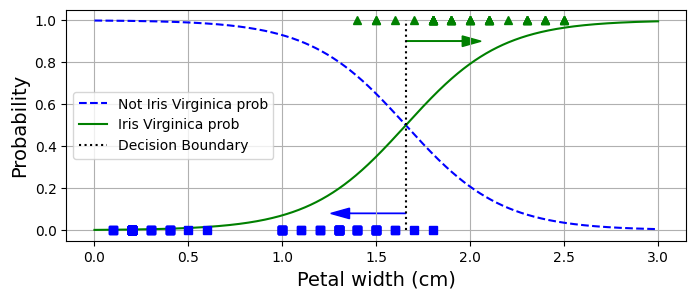

In [151]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
#Retorna um array de duas colunas, coluna 0: probabilidade da classe 0 e coluna 1 probabilidade da classe desejada
decision_boundary = X_new[y_proba[:,1] >= 0.5][0, 0]
#Filtro por valores da classe desejada, coluna 1, com probabilidade maior que 0.5

plt.figure(figsize=(8,3))
plt.plot(X_new, y_proba[:, 0], 'b--', label='Not Iris Virginica prob')
plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris Virginica prob')
plt.plot([decision_boundary,decision_boundary],[0,1], 'k:', label='Decision Boundary')

plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(x=decision_boundary, y=0.9, dx=0.3, dy=0, head_width=0.05, head_length=0.1, fc='g', ec='g')

plt.plot(X_train[y_train == 0], y_train[y_train == 0], 'bs')
plt.plot(X_train[y_train == 1], y_train[y_train == 1], 'g^')

plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")

plt.grid()
plt.legend(fontsize=10, loc='center left')
plt.show()

O exemplo de modelo abaixo calcula o 3 parametros: 
* 2 parametros para as features
* 1 para o intercepto

O limiar é expresso por:

${\theta_0 + \theta_1\ x_1 + \theta_2\ x_2 = 0}$
* se y > 0, entao o modelo estima a classe 1
* se y < 0, entao o modelo estima a classe 0

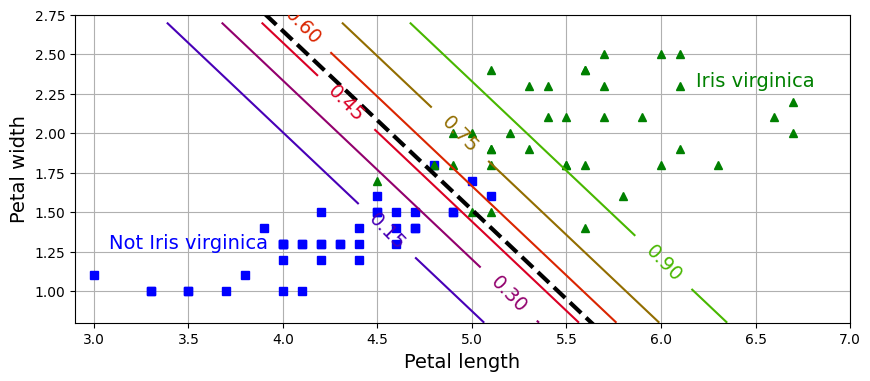

In [165]:

X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(C=2, random_state=42)
log_reg.fit(X_train, y_train)

# for the contour plot
x0, x1 = np.meshgrid(np.linspace(2.9, 7, 500).reshape(-1, 1),
                     np.linspace(0.8, 2.7, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]  # one instance per point on the figure
y_proba = log_reg.predict_proba(X_new)
zz = y_proba[:, 1].reshape(x0.shape)

# for the decision boundary
left_right = np.array([2.9, 7])
boundary = -((log_reg.coef_[0, 0] * left_right + log_reg.intercept_[0])
             / log_reg.coef_[0, 1])

plt.figure(figsize=(10, 4))
plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], "bs")
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], "g^")
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.27, "Not Iris virginica", color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", color="g", ha="center")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.axis([2.9, 7, 0.8, 2.75])
plt.grid()
plt.show()

## Regressão Softmax

Aplicação da regressao logistica em multiplas classes.ELe retorna a classe com maior probabilidade, deve ser usado com classes multuamente exclusivas

# 📘 Regressão Softmax (Multinomial Logistic Regression)

A **Regressão Softmax** é a generalização da regressão logística para problemas de **classificação multiclasse**, onde o objetivo é prever uma entre $K$ classes possíveis.

O modelo estima simultaneamente as probabilidades:

$${
P(y = k \mid \mathbf{x}) \quad \text{para } k = 1, 2, \dots, K.

}
$$

---

## 🔢 Função Softmax

Observe a linearização entre a exponencial prevista com a soma de todas as exponenciais.

A função Softmax transforma o vetor de *scores* lineares em um vetor de **probabilidades que somam 1**.

Para cada classe $k$:


$${
\hat{p}_k = P(y = k \mid \mathbf{x}) = 
\frac{e^{\mathbf{\theta}_k^\top \mathbf{x}}}
{\sum_{j=1}^{K} e^{\mathbf{\theta}_j^\top \mathbf{x}}}
}$$

onde:

- $\mathbf{x}$ é o vetor de atributos (features)
- $\mathbf{\theta}_k$ são os parâmetros da classe $k$

---

## 🧠 Logits e função de decisão

O modelo calcula um *score* (logit) para cada classe:


$${
s_k = \mathbf{\theta}_k^\top \mathbf{x}
}$$

A classe prevista é aquela com maior probabilidade:

$${
\hat{y} = \arg\max_k \hat{p}_k
}$$



---

## 📐 Função de custo (Entropia Cruzada Multiclasse)

A regressão Softmax utiliza a **cross-entropy**:

$${
J(\Theta) = - \frac{1}{m} \sum_{i=1}^{m}
\sum_{k=1}^{K} y_{i,k} \log(\hat{p}_{i,k})
}$$

onde:

- $m$ = número de exemplos
- $y_{i,k}$ = 1 se o exemplo $i$ pertence à classe $k$ (one-hot encoding)
- $\hat{p}_{i,k}$ = probabilidade prevista para a classe $k$

---

## 🔧 Treinamento

Os parâmetros são ajustados por **gradiente descendente**:



$${
\Theta := \Theta - \eta \, \nabla_\Theta J(\Theta)
}$$

---

## 🎯 Quando usar Regressão Softmax?

- Problemas com **3 ou mais classes**
- Dados **linearmente separáveis** ou aproximadamente lineares
- Quando interpretabilidade é importante (coeficientes explícitos)
- Quando queremos probabilidades bem calibradas



# 📘 Exemplo Completo de Regressão Softmax  
### (3 classes e 2 features)

Vamos calcular manualmente a predição de um modelo Softmax com:

- 3 classes (A, B, C)  
- 2 features  
- 1 exemplo para classificar  

---

# 🔢 1. Vetor de entrada

$$
x =
\begin{bmatrix}
2 \\
3
\end{bmatrix}
$$

---

# 🧮 2. Parâmetros do modelo

### Classe A
$$
\theta_A =
\begin{bmatrix}
1 \\
2 \\
-1
\end{bmatrix}
$$

### Classe B
$$
\theta_B =
\begin{bmatrix}
-2 \\
1 \\
2
\end{bmatrix}
$$

### Classe C
$$
\theta_C =
\begin{bmatrix}
0 \\
-1 \\
1
\end{bmatrix}
$$

---

# 🟦 3. Cálculo dos logits

A fórmula geral:
$$
s_k = \theta_{k,0} + \theta_{k,1} x_1 + \theta_{k,2} x_2
$$

---

### Classe A
$$
s_A = 1 + 2(2) + (-1)(3)
$$
$$
s_A = 2
$$

### Classe B
$$
s_B = -2 + 1(2) + 2(3)
$$
$$
s_B = 6
$$

### Classe C
$$
s_C = 0 + (-1)(2) + 1(3)
$$
$$
s_C = 1
$$

---

# 🔥 4. Aplicando Softmax

Primeiro calculamos:

$$
e^{s_A} = e^{2} = 7.389
$$

$$
e^{s_B} = e^{6} = 403.429
$$

$$
e^{s_C} = e^{1} = 2.718
$$

Soma:

$$
Z = 7.389 + 403.429 + 2.718 = 413.536
$$

---

# 🟨 5. Probabilidades finais

### Classe A
$$
P(A) = \frac{7.389}{413.536} = 0.0179
$$

### Classe B
$$
P(B) = \frac{403.429}{413.536} = 0.9756
$$

### Classe C
$$
P(C) = \frac{2.718}{413.536} = 0.0065
$$

---

# 🎯 6. Classe prevista

A maior probabilidade é:

$$
\hat{y} = \arg\max \{P(A), P(B), P(C)\} = B
$$

---

# 📌 Resumo final

| Classe | Logit \(s_k\) | \(e^{s_k}\) | Probabilidade |
|--------|--------------|------------|----------------|
| A | 2 | 7.389 | 0.0179 |
| B | 6 | 403.429 | **0.9756** |
| C | 1 | 2.718 | 0.0065 |

➡️ **A classe prevista pelo modelo é B.**


In [169]:
X = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = iris['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,30
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [178]:
softmax_reg.predict([[5,2]])

array([2])

In [175]:
softmax_reg.predict_proba([[5,2]]).round(2)

array([[0.  , 0.04, 0.96]])

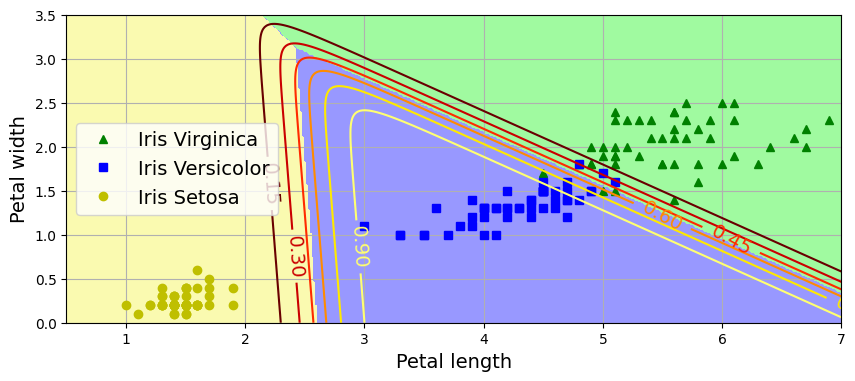

In [ ]:
from matplotlib.colors import ListedColormap

#Mapa de cores customizado
custom_map = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])

#np.mesgrid() cria combinações entre os valores de cada matriz. Contem todas as combinações da grade
x0,x1 = np.meshgrid(np.linspace(0,8,500).reshape(-1,1), np.linspace(0,3.5,200).reshape(-1,1))
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:,1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10,4))

plt.plot(X[y==2, 0], X[y==2, 1], 'g^', label='Iris Virginica')
plt.plot(X[y==1, 0], X[y==1, 1], 'bs', label='Iris Versicolor')
plt.plot(X[y==0, 0], X[y==0, 1], 'yo', label='Iris Setosa')

#Colorir regioes da grade, x0 (valores eixo X), x1(valores eixo Y), zz(tradução para o mapa de cores)
plt.contourf(x0,x1,zz,cmap=custom_map)
contour = plt.contour(x0,x1,zz1,cmap='hot')
plt.clabel(contour, inline=1)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc='center left')
plt.axis([0.5,7,0,3.5])
plt.grid()
plt.show()

Tentar fazer o mapa de cores com probabilidade vs petal width e proba vs petal length 